In [2]:
# Import libraries
import pandas as pd #Used for dataframe manipulation
import numpy as np # A package used for numerical analysis
import seaborn as sns # library used for data visualization
import matplotlib.pyplot as plt # library used for data visualization
from matplotlib.figure import Figure
import os
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) # Used for x & y axis / label to be seen clearly or visible

In [3]:
# Read the file, use pandas to load the dataframe
admission_df = pd.read_csv('Admission_Predict.csv')


In [4]:
# Data Exploration
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Data Cleanup, drop insignificant column. Drop the Serial No. column
# axis = 1 is for dropping the entire column
#  inplace = True is to change or get rid of the value in memory
admission_df.drop('Serial No.', axis = 1, inplace = True) 
admission_df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Perform Exploratory Data Analysis

In [6]:

# Check for null values or missing data
admission_df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Check dataframe info (how many elements, what are the columns, the datatype)
admission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
# Statistical summanry of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# Group by University rating
df_university_rating = admission_df.groupby(by = 'University Rating').mean()
df_university_rating

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


# Perform Data Visualization

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

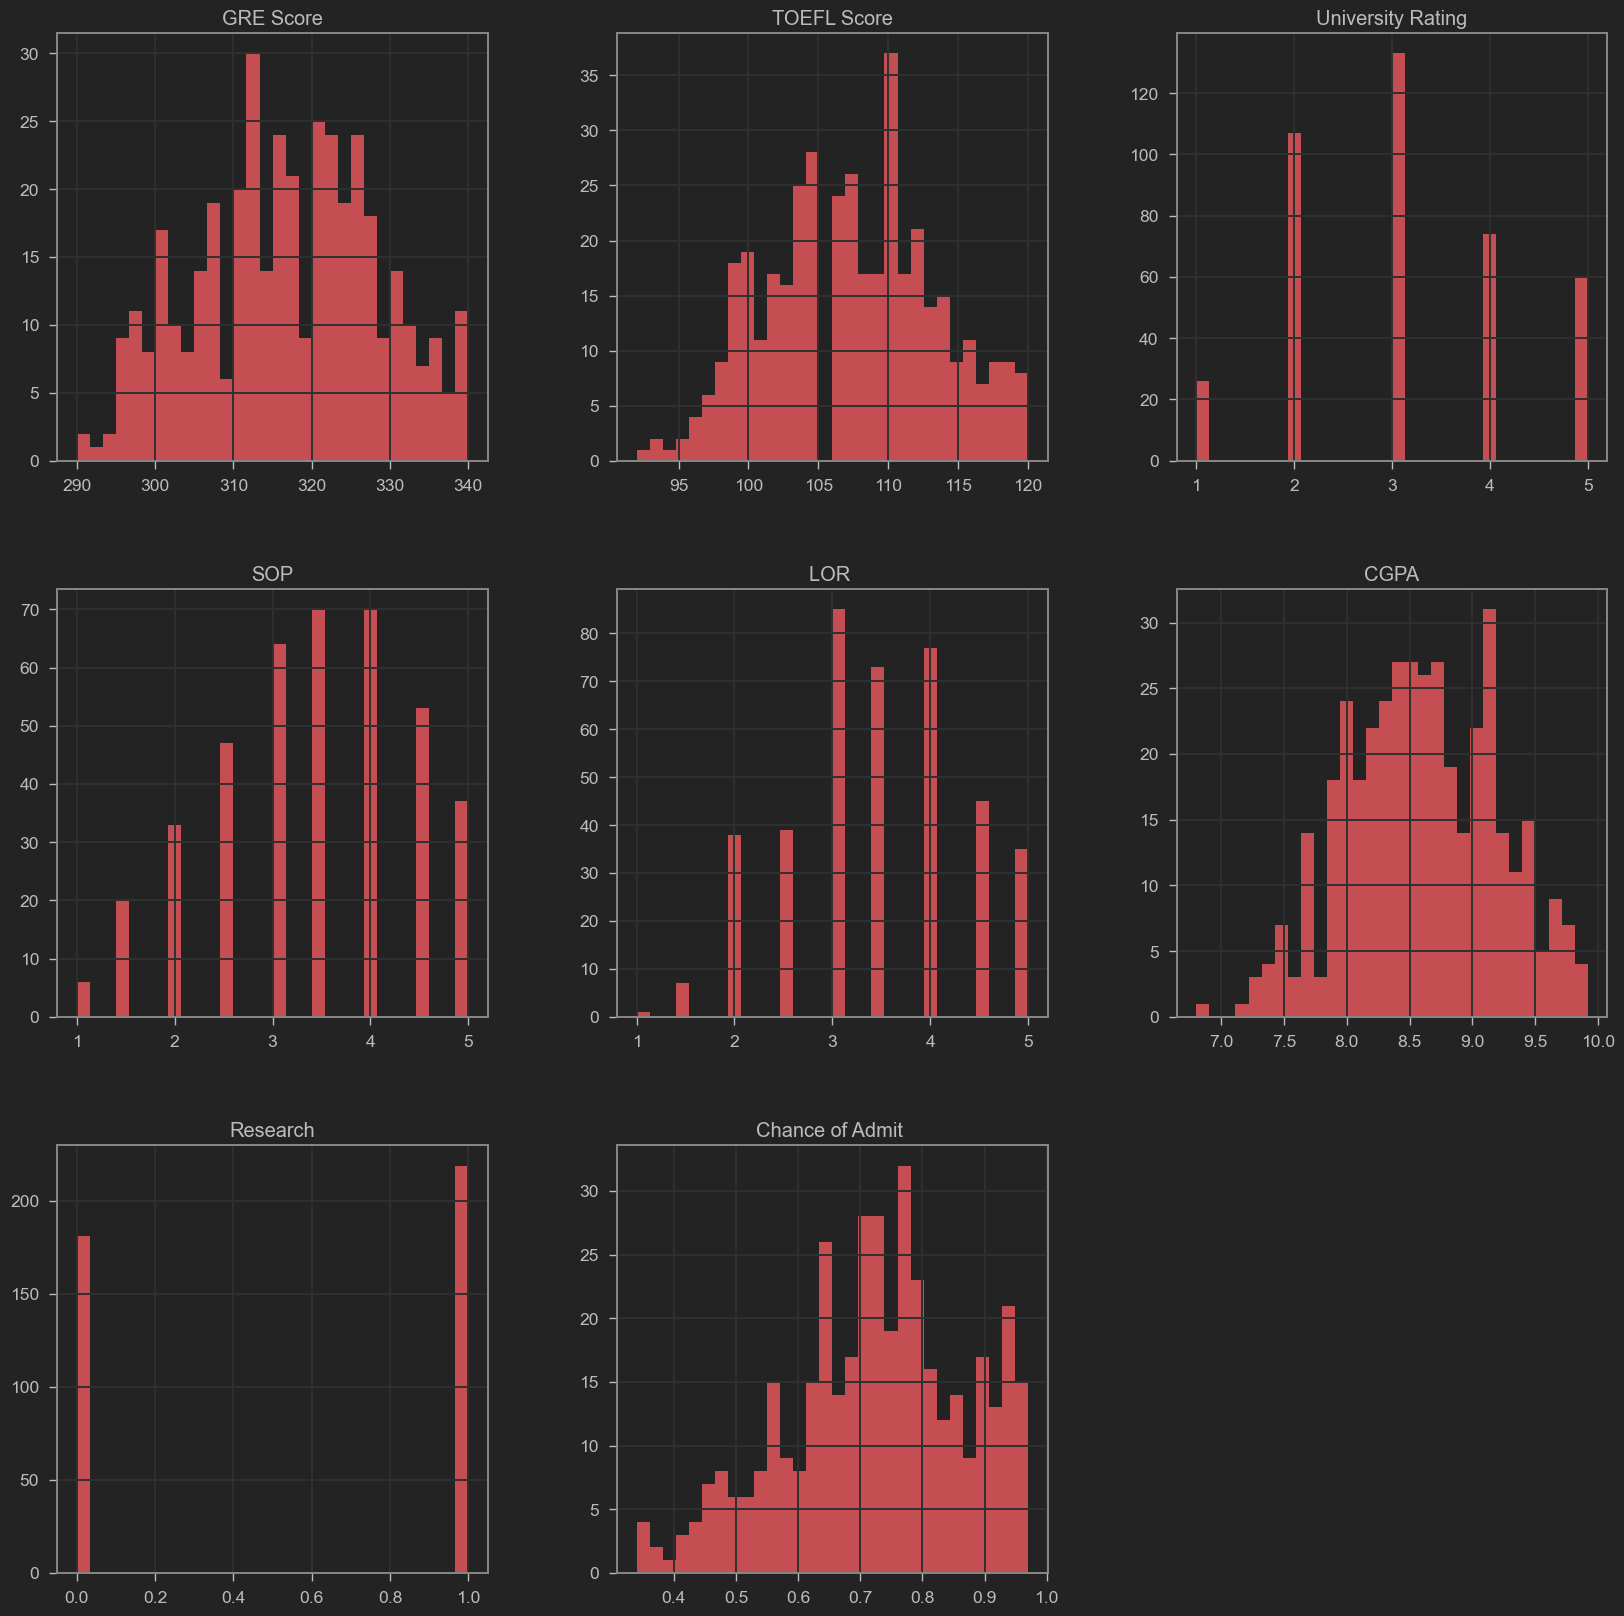

In [10]:
# Plot a histogram of the data / distribution of the variables / features / distribution of data
admission_df.hist(bins = 30, figsize= (20,20), color = 'r' )

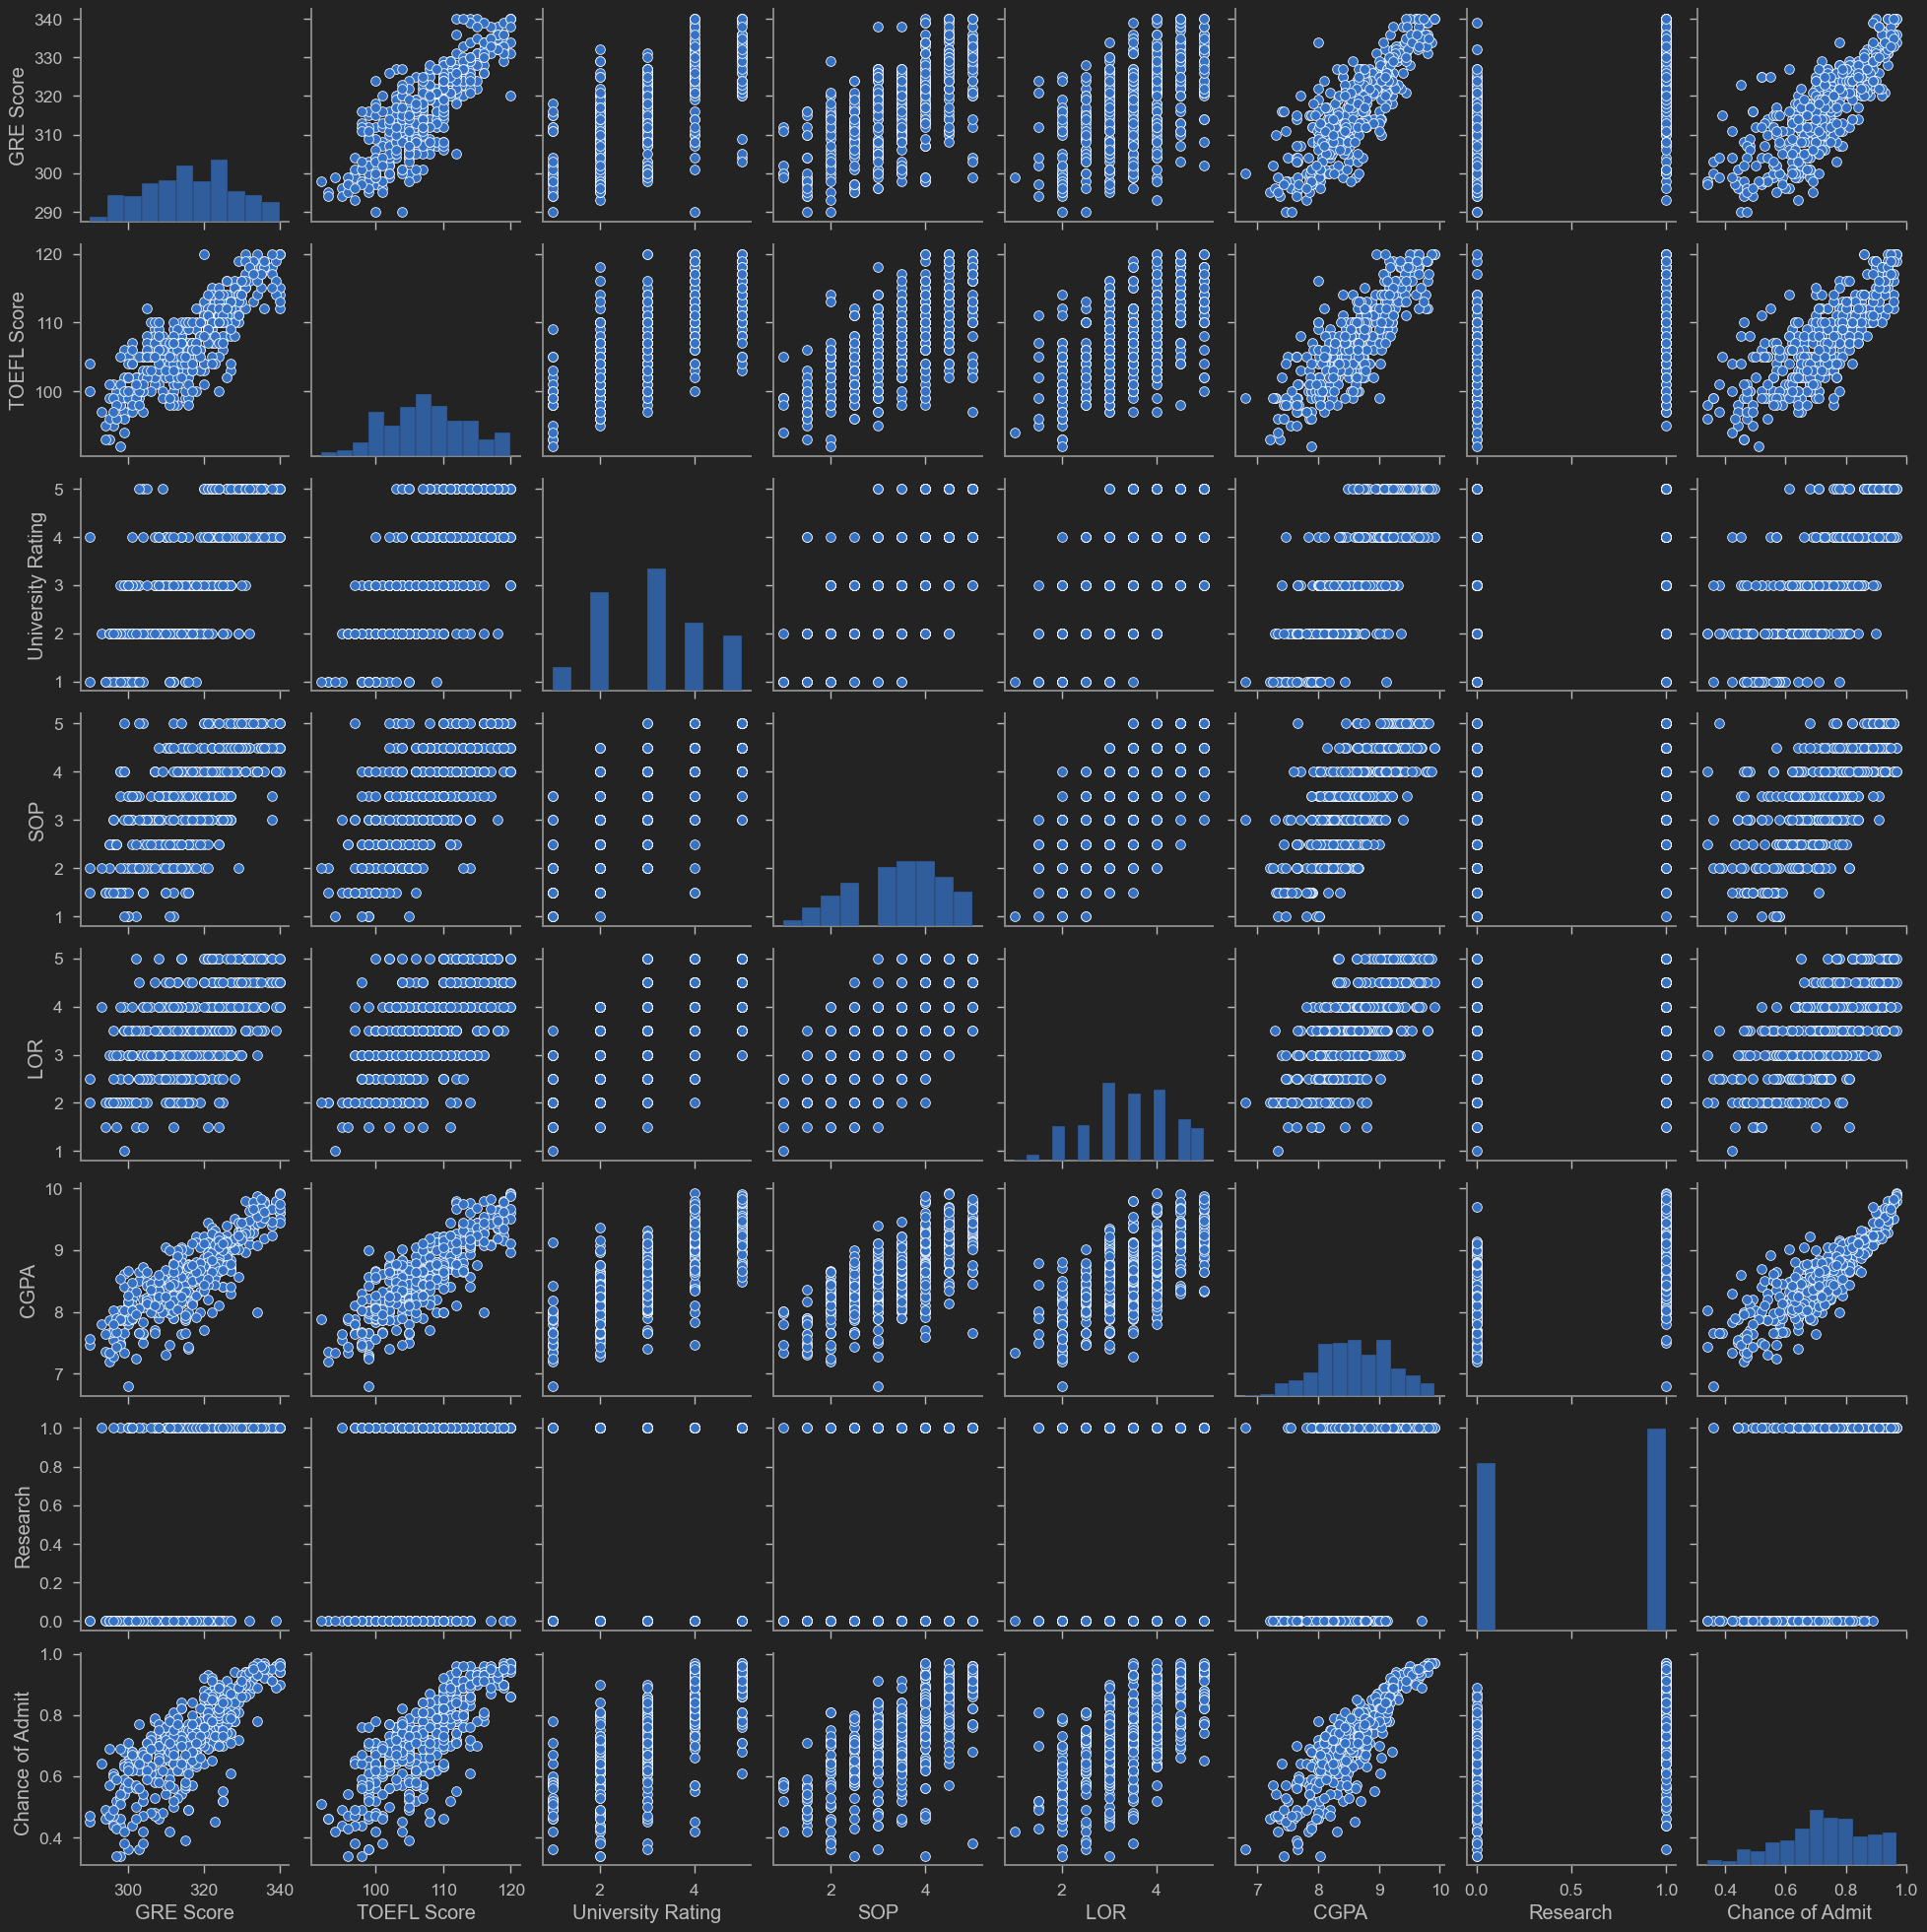

In [11]:
# Use seaborn library for plot the pairplot to take a look of the relationship between every single variable or feature in the dataframe
# this gives a view of the relationship between dependent and independent variables
sns.pairplot(admission_df)

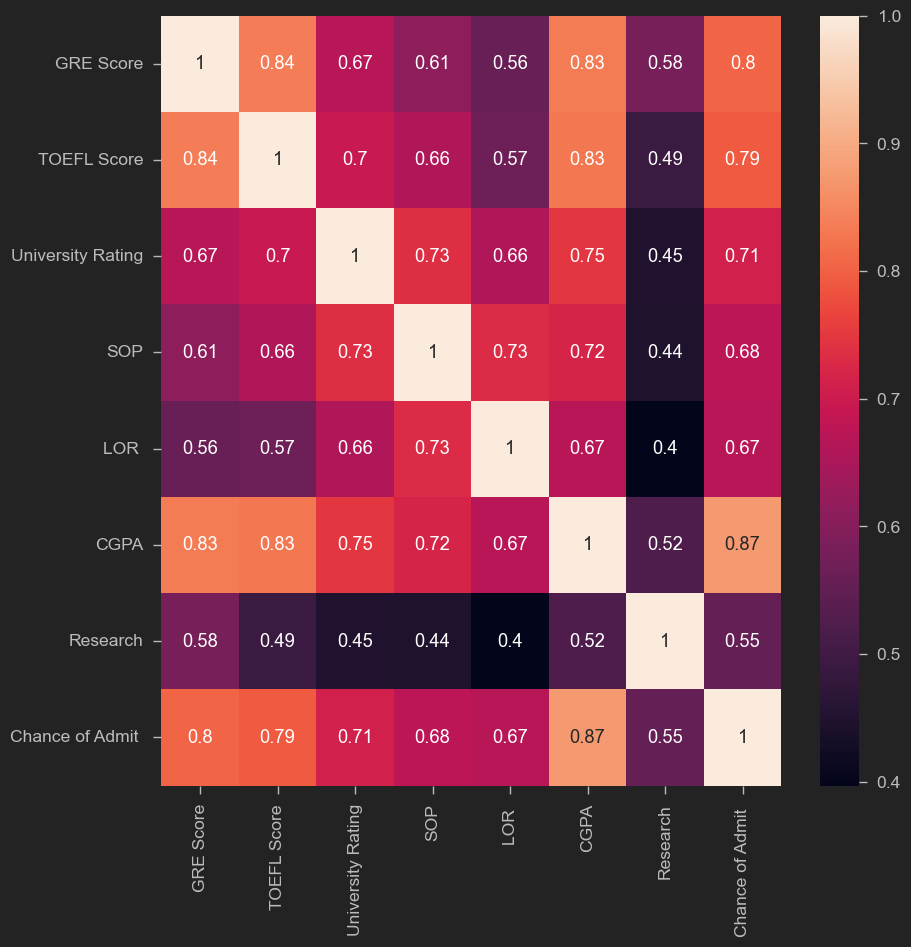

In [12]:
# Plot the correlation / get the correlations of the data
corr_matrix = admission_df.corr()

#Use seaborn to plot the heat map
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot= True) # annot = True to see the actual #s when plotting the heatmap
plt.show()


# CREATE TRAINING AND TESTING DATASET

In [15]:

# Take a look at the admission_df columns
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Divide the data into inputs and outputs

In [18]:
# Inputs ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',  'Research') - these are the independent variables
# drop the Chance of Admit column since that's our output variable
X = admission_df.drop(columns = ['Chance of Admit '])

In [19]:
# Ouput (Chance of Admit) is the target variable, this the one that we are trying to predict, the one where the model is to be built to predict the chance of admission
# Obtain only the Chance of Admit
y = admission_df['Chance of Admit ']

In [20]:
# Take a look at the shape of X
X.shape

(400, 7)

In [21]:
# Take a look at the shape of y
y.shape

(400,)

In [25]:
# Take a look at y
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [26]:
#Convert the data into a numpy array
X = np.array(X)
y = np.array(y)

In [27]:
# Reshape the output variable y to be 400,1, this will be helpful & powerful especially when dividing data into training and testing
y = y.reshape(-1,1)

# take a look at the shape
y.shape

(400, 1)

In [28]:
#scaling the data before training the model, making the features equal, not making the model to be biased
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Instantiate an object out of the class
scaler_x = StandardScaler()

#Apply the fit and transform method to the object to scale the data
X = scaler_x.fit_transform(X) # this gives a new scaled X value

In [29]:
# Scale y
#Instantiate an object out of the class
scaler_y = StandardScaler()

#Apply the fit and transform method to the object to scale the data
y = scaler_y.fit_transform(y) # this gives a new scaled y value

In [30]:
#Splitting the data in to tests and train sets
from sklearn.model_selection import train_test_split

# Set X_train, X_test, y_train, y_test and apply train_test_split and pass along the X, y and specify the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15) # allocate percent of the data for testing group, allocate the rest(85%) for training

# Note the testing data was not seen by the model since we are developing a model capable of generalizing based on the data, not wanting the model to memorize

# Train and evaluate a linear regression model
# Simple Linear Regression:
# In simple linear regression, the goal is to obtain a relationship(model) between X and y.
# We predict  the value of one variable Y based on another variable X.
# X is known as the independent variable and Y is called the dependent variable.
# Why simple? Because it examine the relationship between two variables only.
# Why linear? when the independent variable increased (or decreases), the dependent variable increases (or decreases) in a linear fashion
# Formula: y = b + m * x
# m is the slope of the line
# b is the y intercept ( how much is that line intercept with the y axis)
# When you say that you train your model: it is saying that you obtain the best values of m and b, it is able to fit all the data points.                  #You can use this model in the future and apply to make predictions based on new data that the model has not seen before to make predictions
"""

# What is multiple linear regression
# It examines the relationship between more than two variables
# In multiple linear regression, each independent variable has its own corresponding coefficient



# How to obtain model parameters? Least sum of squares
# - least squares fitting is a way to find the best fit curve or line for a set of points.
# - the sum of the squares of the offsets(residuals) are used to estimate the best fit curve or line
# - least squares method is used to obtain  the coefficients m and b

In [31]:
# Train linear regression models
from sklearn.linear_model import LinearRegression

# Look at the metrics, get the accuracy score
from sklearn.metrics import mean_squared_error, accuracy_score

In [32]:
# Instantiate an object out of the LinearRegression class
LinearRegression_model = LinearRegression()

#Apply the fit method to my object
LinearRegression_model.fit(X_train, y_train) # fitting the data & the data here are the X_train (the input) & y_train (the output)

LinearRegression()

In [34]:
#Evaluate this model
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test) # this data the model has not seen before
accuracy_LinearRegression

0.8376485282822252

# Based on the accuracy score above, it was able to achieve almost 83% accuracy on the testing data which the model has not seen before